In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0
    
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [3]:
def generate_train_data():
    result = []

    for x in range(1000):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)

        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        result.append([n1, n2, n3])

    return result


In [4]:
# We assign valuesw1 to w6
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1

# and three biases
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# We store the original weights and biases
w1_initial = w1
w2_initial = w2
w3_initial = w3
w4_initial = w4
w5_initial = w5
w6_initial = w6
bias1_initial = bias1
bias2_initial = bias2
bias3_initial = bias3

# Training Parameters
LR = 0.001

epochs = 1000

# Dataset for training
data = [
    [1, 0, 2],
    [2, 1, 6],
    [3, 3, 17]
]

data = generate_train_data()

# Initialize a list for loss points
loss_points = []

In [5]:
# The loop runs for a specified number of epochs which is 1000 as of now
for epoch in range(epochs):

    # loop processes each row in the dataset one at a time.
    for row in data:
        input1 = row[0] # first feature
        input2 = row[1]  # second feature
        true_value = row[2] # true value

        # FORWARD PASS


        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)


        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the the previous weights
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        # probably used later, we might want to have error metrics (MSE)
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2






        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5


        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6


        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3


        


        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # weight 2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        
        # weight 4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

       
        # bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        
        #FINALLY UPDATE THE EXISTING WEIGHTS!
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    loss_points.append(loss)
    print(f"Epoch: {epoch +1}, loss {loss}")

Epoch: 1, loss 2.9427171004048756
Epoch: 2, loss 2.0433637200866253
Epoch: 3, loss 1.6190514982084165
Epoch: 4, loss 1.3325815266622096
Epoch: 5, loss 1.1416224153047128
Epoch: 6, loss 1.0181940044765438
Epoch: 7, loss 0.9409862884226627
Epoch: 8, loss 0.8425194298764365
Epoch: 9, loss 0.8223768365435706
Epoch: 10, loss 0.7648932353197188
Epoch: 11, loss 0.7315647188151484
Epoch: 12, loss 0.7176732779427653
Epoch: 13, loss 0.698427308759479
Epoch: 14, loss 0.6836502086793245
Epoch: 15, loss 0.6721223037713461
Epoch: 16, loss 0.6633180932325573
Epoch: 17, loss 0.6562559206670171
Epoch: 18, loss 0.6503636895238597
Epoch: 19, loss 0.6455474782901902
Epoch: 20, loss 0.6414810051541481
Epoch: 21, loss 0.6379854045867677
Epoch: 22, loss 0.6349659205316343
Epoch: 23, loss 0.6323499816605345
Epoch: 24, loss 0.6300804181431555
Epoch: 25, loss 0.6281109898010317
Epoch: 26, loss 0.6264034334297204
Epoch: 27, loss 0.6249254994798784
Epoch: 28, loss 0.6236496251576639
Epoch: 29, loss 0.622552014105

In [6]:
print("ORIGINAL WEIGHTS AND BIASES")

print(f"w1: {w1_initial}")
print(f"w2: {w2_initial}")
print(f"w3: {w3_initial}")
print(f"w4: {w4_initial}")
print(f"w5: {w5_initial}")
print(f"w6: {w6_initial}")
print(f"b1: {bias1_initial}")
print(f"b2: {bias2_initial}")
print(f"b3: {bias3_initial}")

print("\n\n######################################")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")
print(f"w4: {w4}")
print(f"w5: {w5}")
print(f"w6: {w6}")
print(f"b1: {bias1}")
print(f"b2: {bias2}")
print(f"b3: {bias3}")


ORIGINAL WEIGHTS AND BIASES
w1: 1
w2: 0.5
w3: 1
w4: -0.5
w5: 1
w6: 1
b1: 0.5
b2: 0
b3: 0.5


######################################
NEW WEIGHTS AND BIASES
w1: 1.369447300539387
w2: 4.135868713299464
w3: 1.0968426279451817
w4: -0.009479410183040179
w5: 0.9038163830423045
w6: 1.203496292133524
b1: -3.5636099366061633
b2: -6.958199230579098
b3: 5.310421951994228


Losses

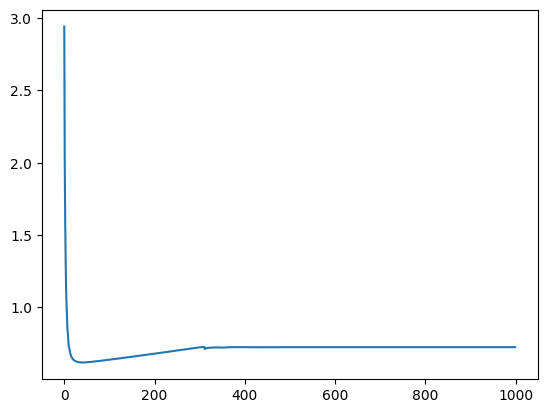

In [7]:
plt.plot(loss_points)
plt.show()

In [8]:
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # FORWARD PASS

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the the previous weights
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [9]:
predict(2, 5)

11.04554857762961

Experiment with different values:

Change LR to 0.001 and we got a great one